<a href="https://colab.research.google.com/github/Al-Tayeb96/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

## Project Overview

#Imports

In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Inspect Data

In [2]:

path="/content/drive/MyDrive/ CodingDojo/01-Fundamentals/Week02/Data folder/sales_predictions_2023.csv"
df_sales=pd.read_csv(path)



In [3]:
df2_sales=df_sales.copy()

In [4]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df_sales.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [6]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## How many rows and columns?

In [7]:
df_sales.shape

(8523, 12)

There are 8523 rows and 12 columns

##What are the datatypes of each variable?

In [8]:
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

All  data types are as they should be.



## Clean Data

##Are there duplicates? If so, drop any duplicates.

In [9]:
duplicates_rows_all=df_sales.duplicated().sum()
duplicates_rows_all

0

##This datafram don't have any duplicates.

##Identify missing values.

In [10]:
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
round(df_sales.isna().sum()/len(df_sales)*100,2)

Item_Identifier               0.00
Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.28
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64

Missing Values:

There are 1463 missing values in the Item_Weight  column. (17.17%)


There are 2410 missing values in the Outlet_Size in usd column. (28.28%)

##Address the missing values by using a placeholder value.

In [12]:
df_sales['Item_Weight'].dtypes

dtype('float64')

In [13]:
df_sales['Item_Weight']=df_sales['Item_Weight'].fillna(-1)


check the data type of Item_Weight
and deal with the missing values, we could fill them in with the  -1 for this feature.

In [14]:
df_sales['Outlet_Size'].dtypes

dtype('O')

In [15]:
df_sales['Outlet_Size']=df_sales['Outlet_Size'].fillna("MISSING")

check the data type of Outlet_Size
and deal with the missing values, we could fill them in with the word MISSING for this feature.

##Confirm that there are no missing values after addressing them.

In [16]:
df_sales.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<Axes: >

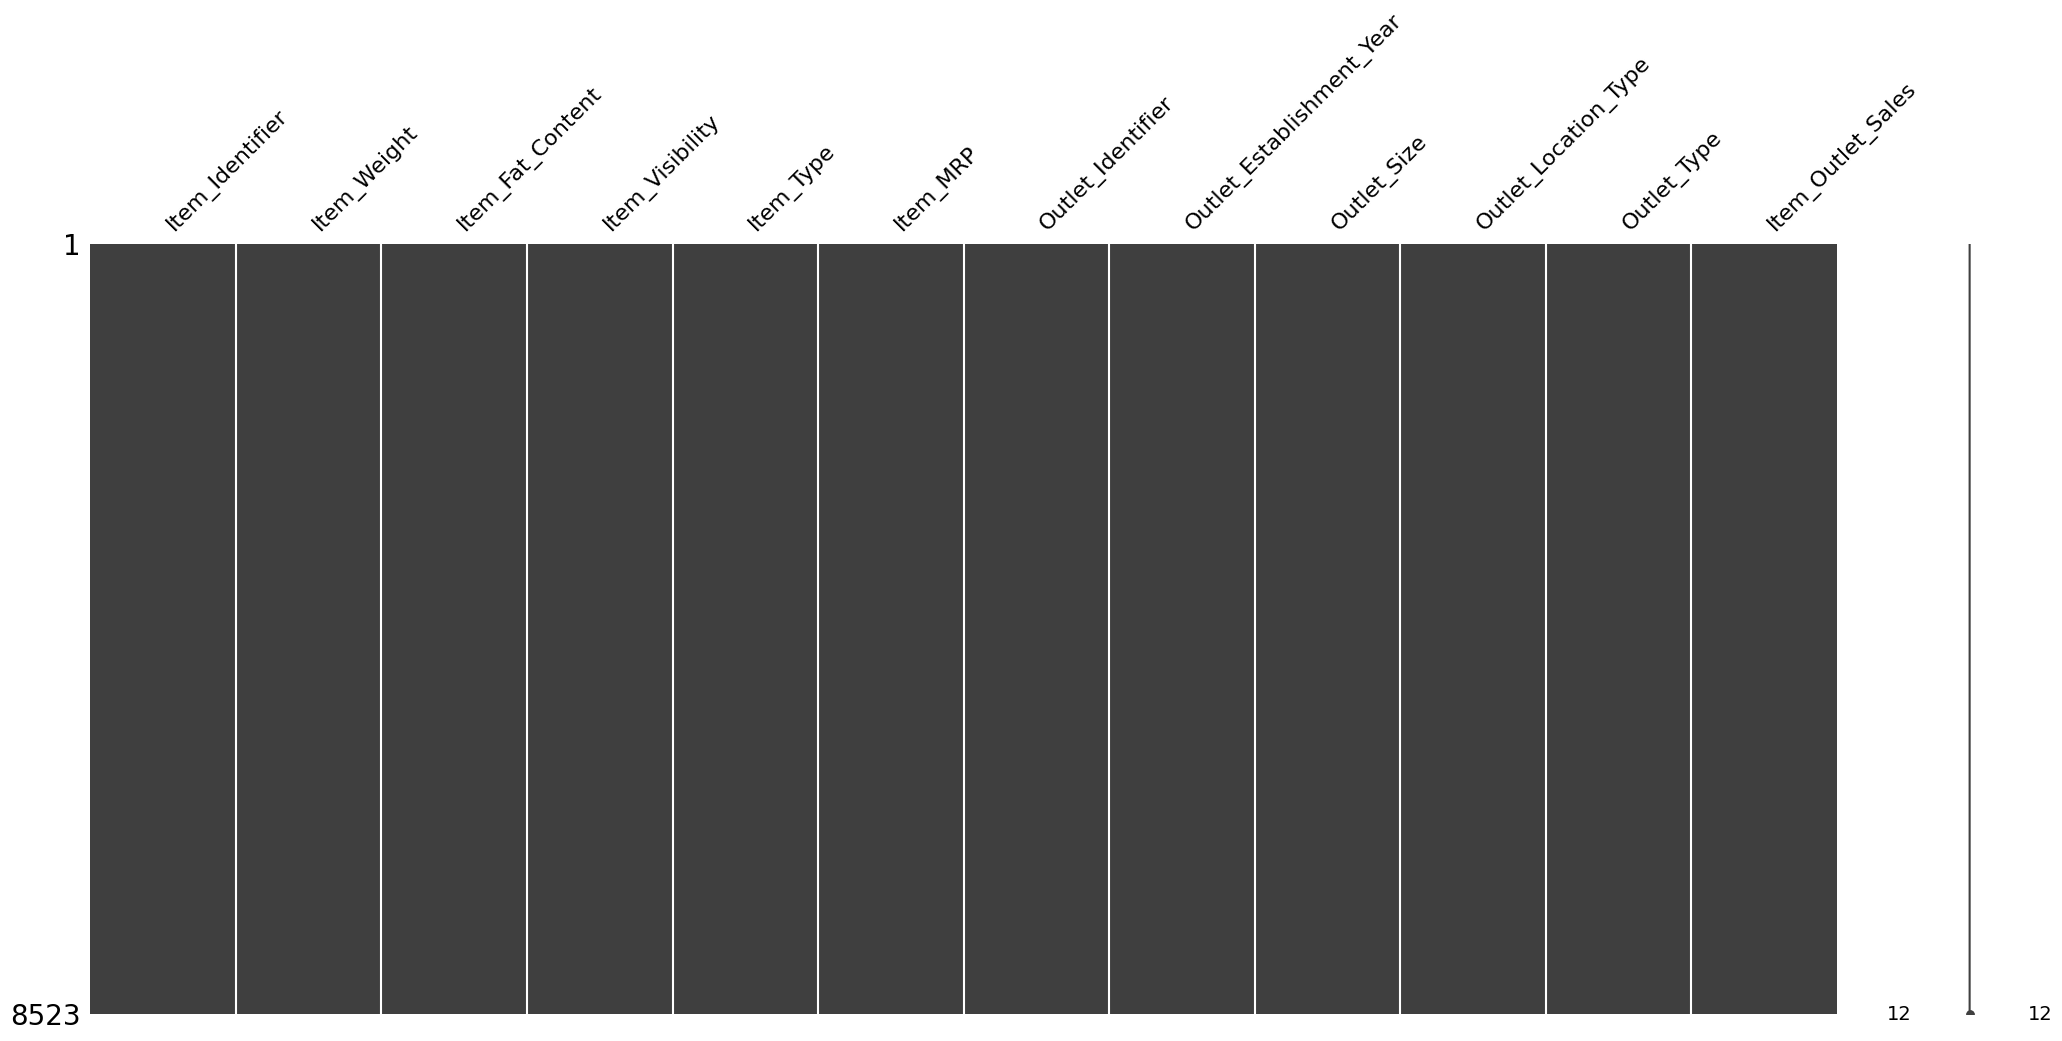

In [17]:
msno.matrix(df_sales)

## Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [18]:
for cols in df_sales:
  print(f"value of {cols} contins ")
  print(df_sales[cols].value_counts())
  print("\n\n")

value of Item_Identifier contins 
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



value of Item_Weight contins 
-1.000     1463
 12.150      86
 17.600      82
 13.650      77
 11.800      76
           ... 
 7.275        2
 7.685        1
 9.420        1
 6.520        1
 5.400        1
Name: Item_Weight, Length: 416, dtype: int64



value of Item_Fat_Content contins 
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



value of Item_Visibility contins 
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64



value of Item_Type contins 
Fruits and Vegetables    1232
Snack Foods              1200
Household            

In [19]:
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

After further investigation of the categorical columns, there are inconsistencies with spellings of the following categories in the Item_Fat_Content column:

LF and low fat should be Low Fat


reg should be Regular


In [20]:
dict_fat={"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"}

In [21]:
for cols in dict_fat:
  df_sales['Item_Fat_Content']=df_sales['Item_Fat_Content'].replace(dict_fat)

In [22]:
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## For any numerical columns, obtain the summary statistics of each (min, max, mean).



In [23]:
numric_df=df_sales.describe().round(2)
numric_df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,10.48,0.07,140.99,1997.83,2181.29
std,6.72,0.05,62.28,8.37,1706.50
min,-1.00,0.00,31.29,1985.00,33.29
25%,6.65,0.03,93.83,1987.00,834.25
50%,11.00,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [24]:
req_num=["min","max","mean"]
numric_df.loc[req_num]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,-1.00,0.00,31.29,1985.00,33.29
max,21.35,0.33,266.89,2009.00,13086.96
mean,10.48,0.07,140.99,1997.83,2181.29


## Exploratory Data Analysis

In [25]:
## Using three seaborn styles: dark_background, seaborn-muted and seaborn-poster.
plt.style.use(['dark_background'])

#Histograms to view the distributions of numerical features in your dataset.

In [26]:
num_cols=df_sales.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

[Text(0.5, 1.0, 'the distributions of numerical features')]

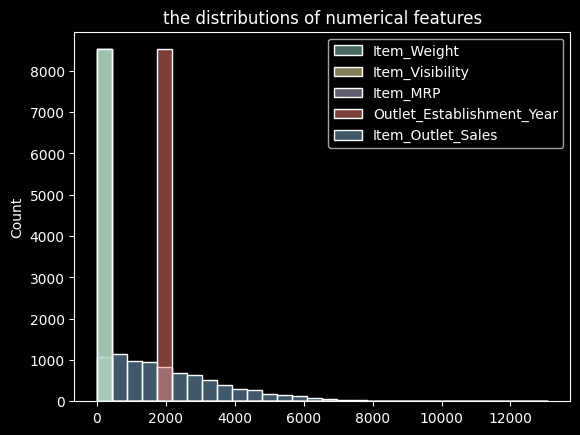

In [27]:
ax=sns.histplot(df_sales,bins=30)
ax.set(title='the distributions of numerical features')


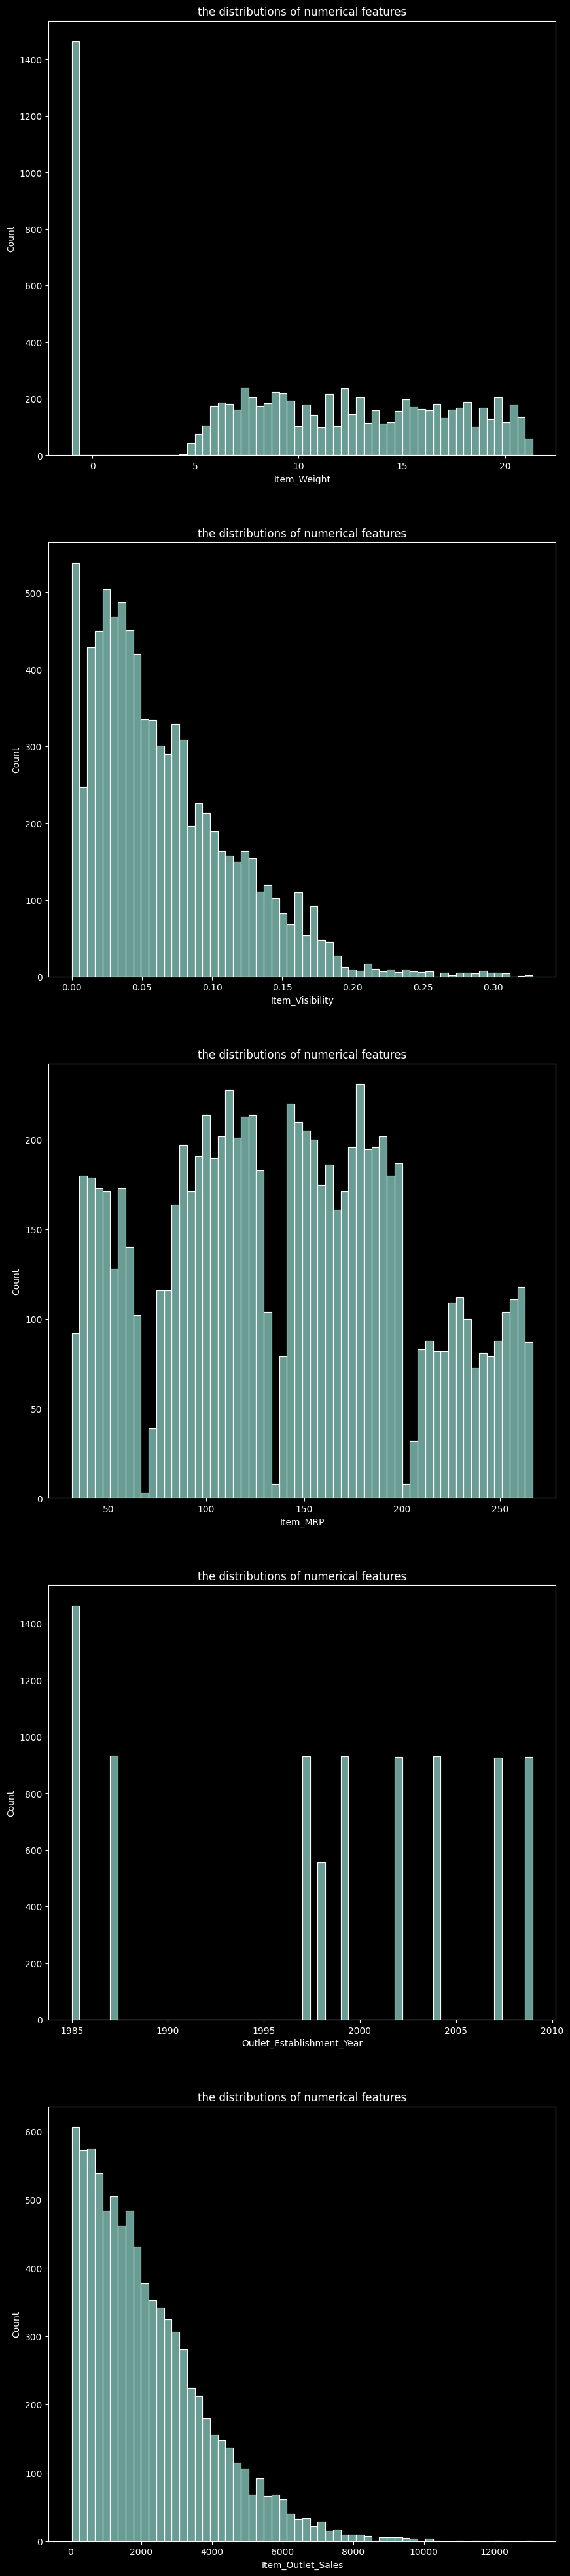

In [28]:
i=0
fig,axes=plt.subplots(len(num_cols),figsize=(10,50))
for cols in num_cols:
   ax=sns.histplot(df_sales,x=cols,bins=60,ax=axes[i])

   ax.set(xlabel=f"{cols}",title="the distributions of numerical features")
   i=i+1


#Boxplots to view statistical summaries of numerical features in your dataset.

[Text(0.5, 1.0, 'statistical summaries of numerical features')]

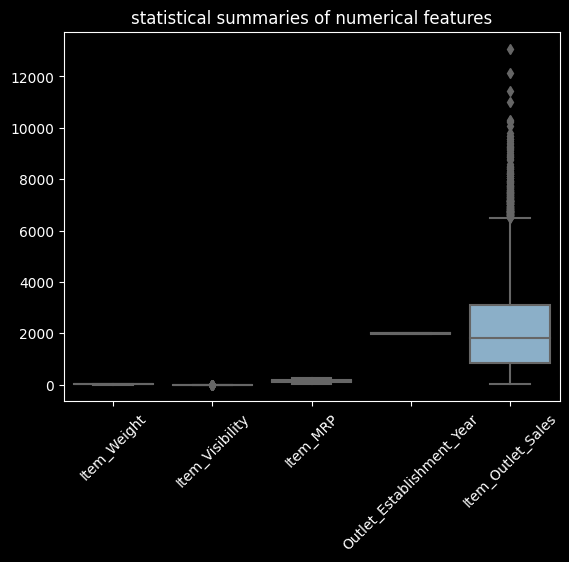

In [29]:
fig,ax=plt.subplots()
ax=sns.boxplot(df_sales)
ax.tick_params(axis='x',rotation=45)
ax.set(title='statistical summaries of numerical features')


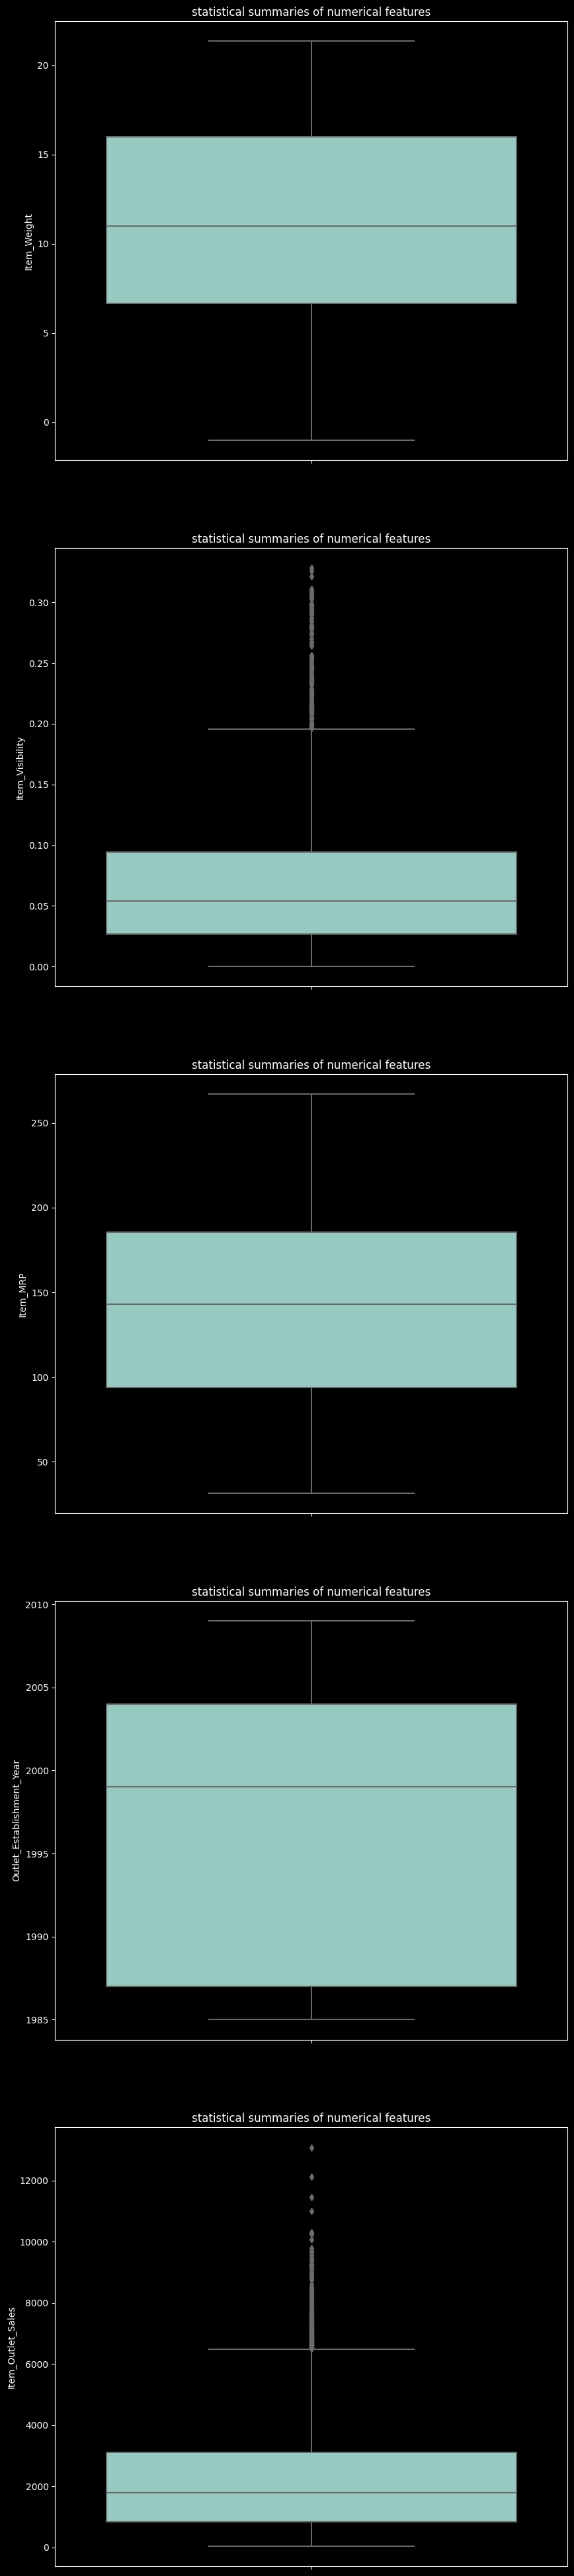

In [30]:
i=0
fig,axes=plt.subplots(len(num_cols),figsize=(10,50))
for cols in num_cols:
   ax=sns.boxplot(df_sales,y=cols,ax=axes[i])

   ax.set(title="statistical summaries of numerical features")
   i=i+1

In [31]:
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [32]:
df_sales['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

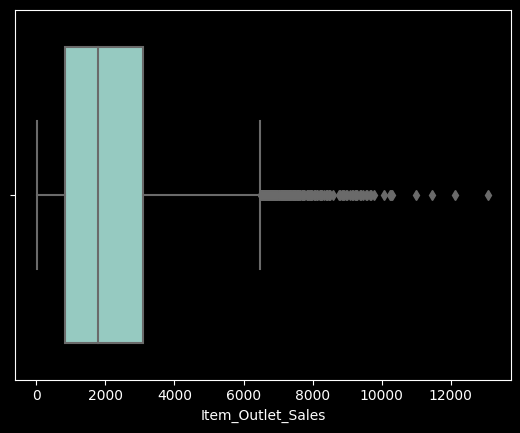

In [35]:
ax=sns.boxplot(df_sales,x="Item_Outlet_Sales")

#Countplots to view the frequency of each class of categorial features in your dataset.

In [36]:
cat_cols=df_sales.select_dtypes("object").columns
cat_cols2=cat_cols[1:len(cat_cols)]
cat_cols2

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

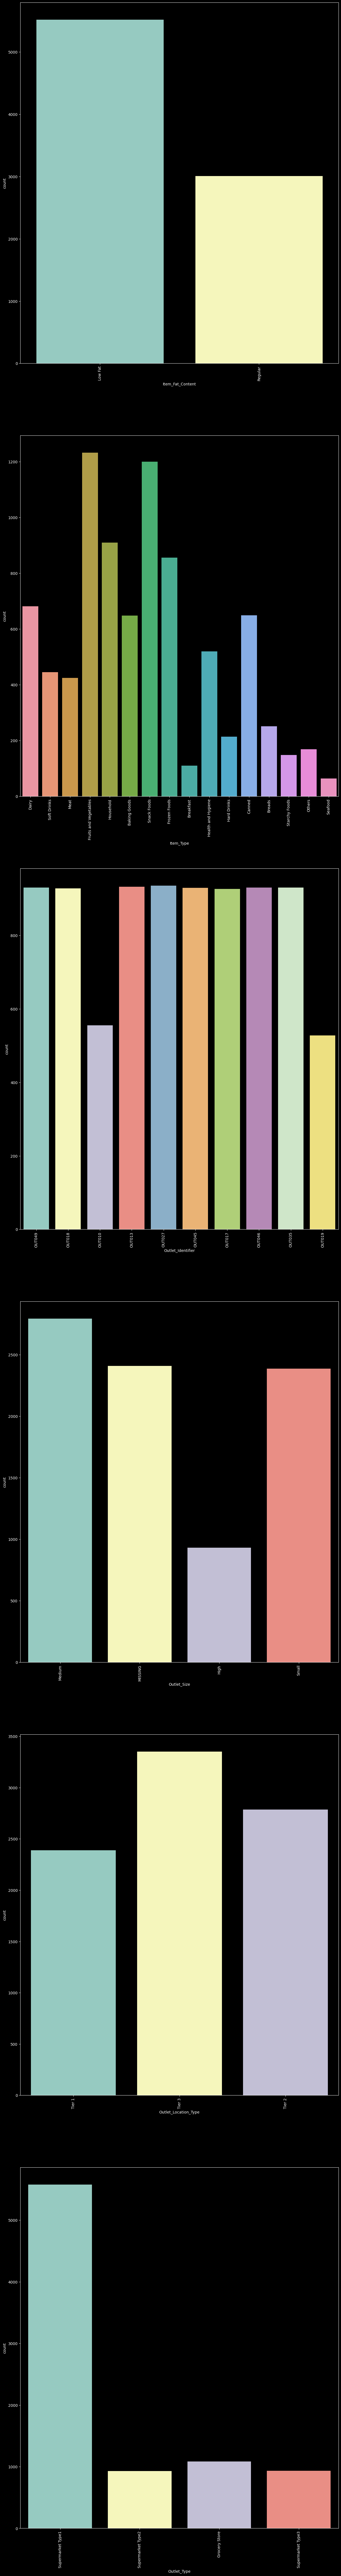

In [37]:
i=0
fig,axes=plt.subplots(len(cat_cols2),figsize=(15,120))
for cols in cat_cols2:
   ax=sns.countplot(df_sales,x=cols,ax=axes[i])

   ax.tick_params(axis='x',rotation=90)
   ax.set(xlabel=f"{cols}")
   i=i+1


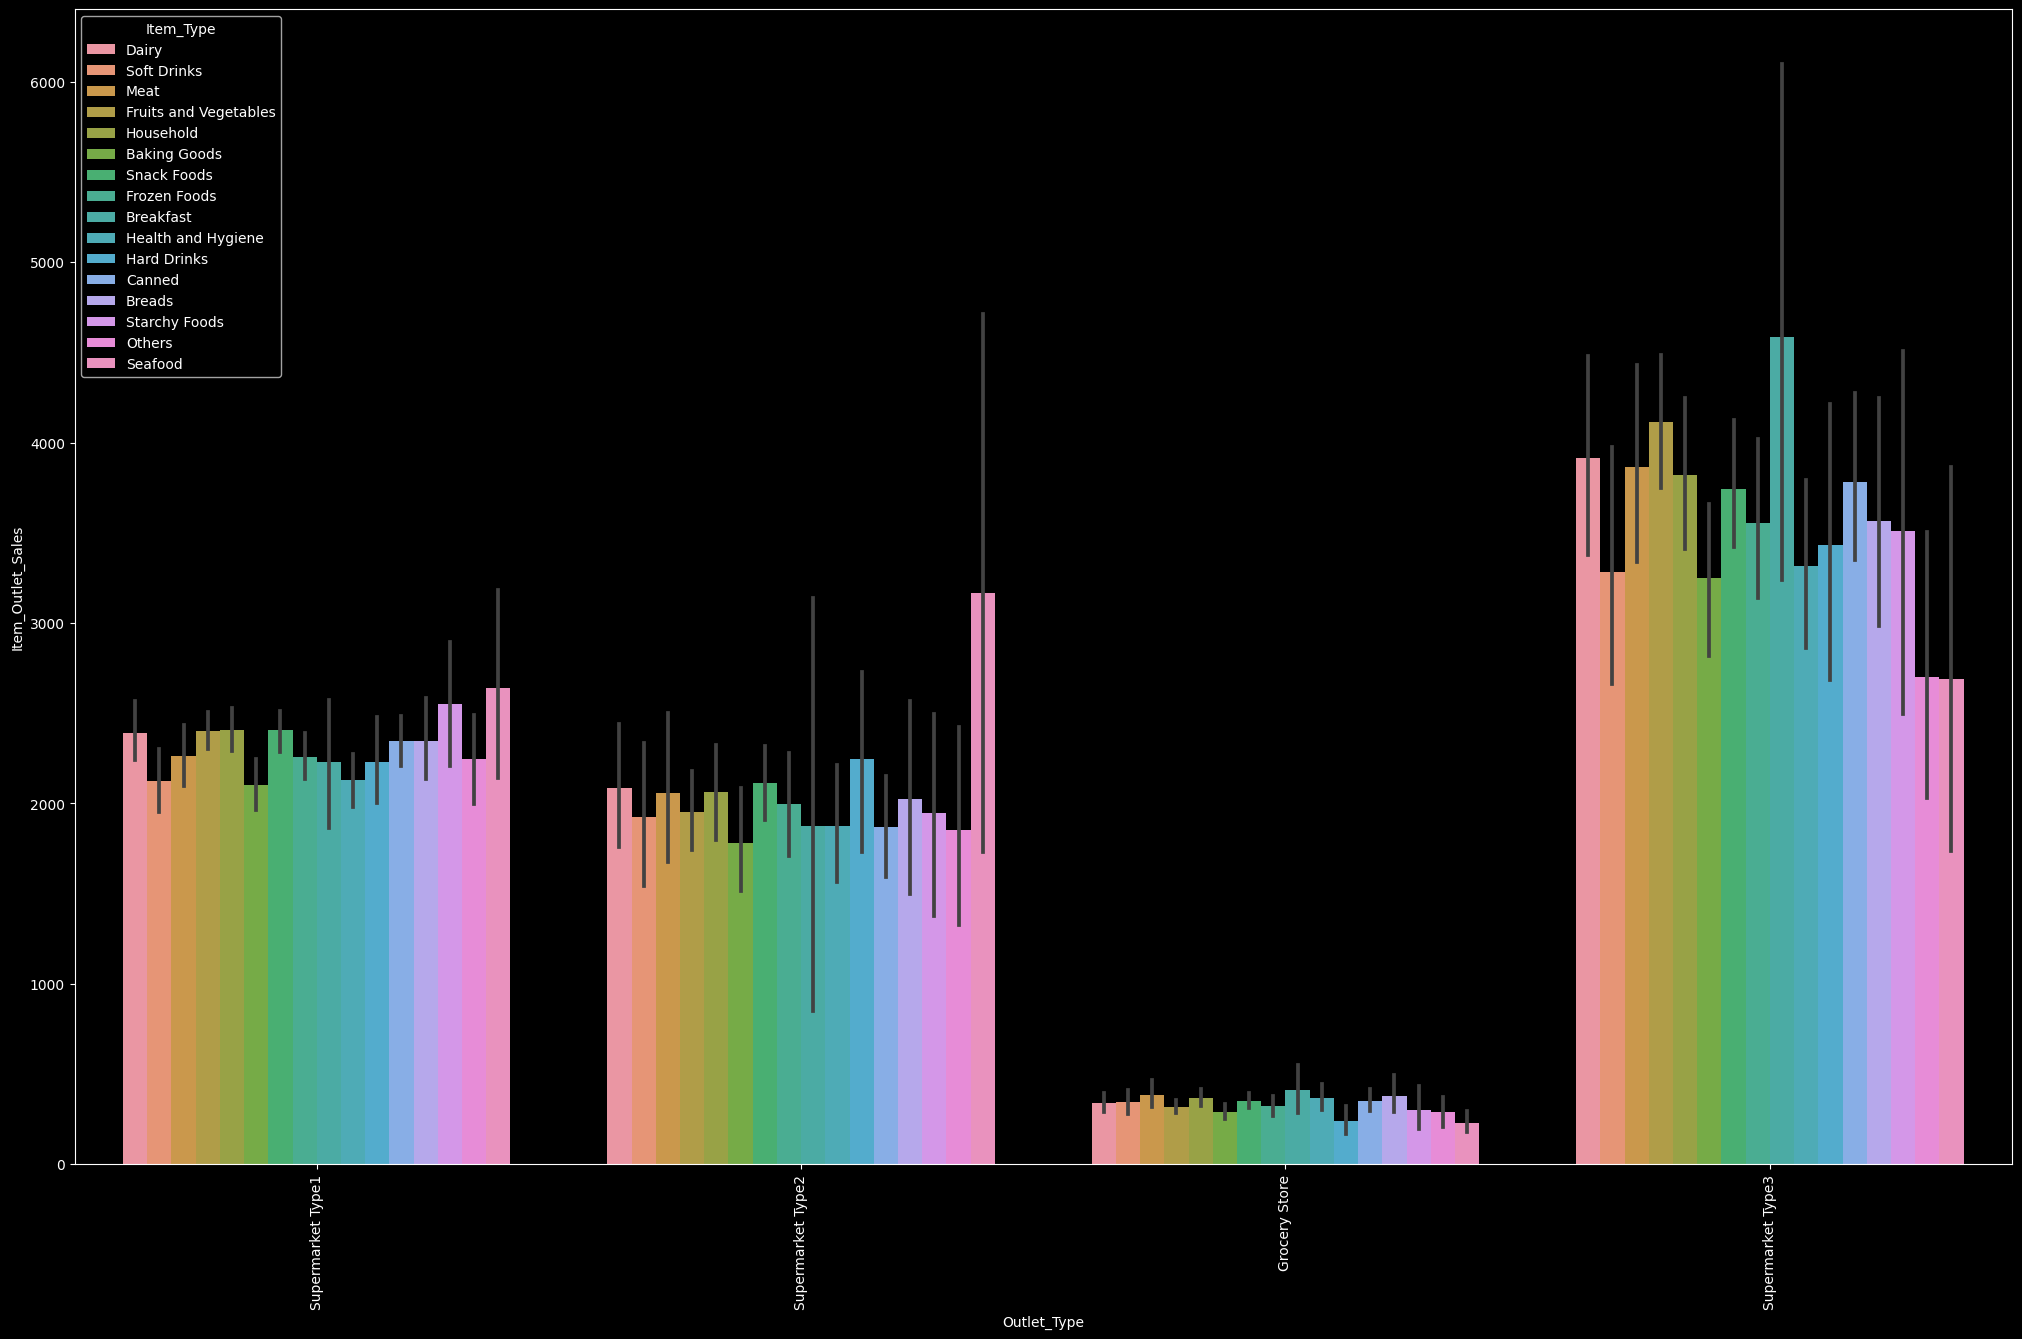

In [70]:
fig,axes=plt.subplots(figsize=(25,15))

ax=sns.barplot(df_sales,x='Outlet_Type',y='Item_Outlet_Sales',hue="Item_Type")
ax.tick_params(axis='x',rotation=90)

#Heatmap to view the correlation between features.

In [61]:
corr=df_sales.corr(numeric_only=True)
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.079371,0.022367,0.537341,-0.055461
Item_Visibility,-0.079371,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.022367,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.537341,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,-0.055461,-0.128625,0.567574,-0.049135,1.000000


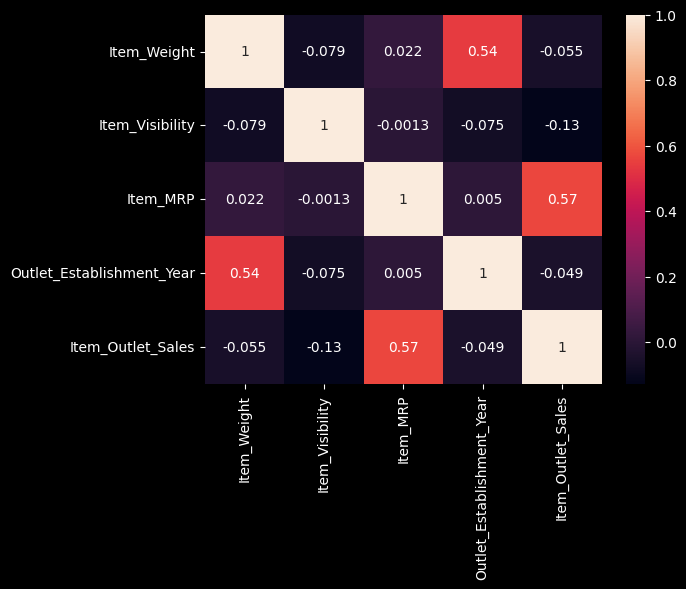

In [62]:
ax=sns.heatmap(corr,annot=True)

## Feature Inspection